In [7]:
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (14,7)

Contrôle de spin sur la sphère
==============================


On s'intéresse au contrôle de l'orientation d'un spin dans un champ magnétique, problème que l'on rencontre dans diverses applications comme l'imagerie médicale (IRM) ou l'ordinateur quantique. 
Un spin (ou qubit en informatique quantique) peut se représenter par un vecteur $\psi \in  \mathbb{R}^3$ de la sphère (*sphère de Bloch*)
$$
S^2= \{ (x,y,z)\in \mathbb{R}^3 \mid x^2+y^2+z^2=1 \} 
$$
et on cherche à simuler son comportement lorsqu'il est placé dans un champ magnétique externe. Plus particulièrement, on voudrait simuler un *transfert de population*, c'est à dire un choix de champ magnétique permettant de faire passer une population de $p$ spins de la position initiale $-e_z = (0,0,-1)$ à la position finale $e_z=(0,0,1)$ en un temps $T$ donné. Les spins n'ayant pas tous exactement les mêmes propriétés de couplage avec le champ magnétique ambiant, il faut que ce transfert soit *robuste*, c'est-à-dire les amenant tous au voisinage de la cible malgré leur hétérogénéité.

Notre système dynamique est donc composé de $p$ sous-systèmes indépendants $(\psi_1,\ldots,\psi_i,\ldots,\psi_p)$, chacun évoluant selon
$$ 
\dot\psi_i = r_i(t) \wedge \psi_i, \qquad \psi_i(0)\in S^2 \tag{1}, \qquad i\in\{1,\ldots, p \}
$$
où $\psi_i\in \mathbb{R}^3$ décrit l'orientation du spin $i$, $r_i(t)\in \mathbb{R}^3$ est le champ magnétique externe ``vu'' par le spin $i$ au temps $t$, et $\wedge$ dénote le produit vectoriel. 

En pratique, on est souvent dans la situation suivante : un champ magnétique $E$ intense selon l'axe $Oz$ fixe, et un champ contrôlable $u(t)$, à choisir, selon l'axe $Ox$. Selon les propriétés de couplage magnétique de chaque spin, chaque spin reçoit alors le champ magnétique
$$
r_i(t)=(\delta_i u(t),0,E_i)
$$ 
avec $E_i\in [E-\alpha,E+\alpha]$ et $\delta_i \in [\delta_{\min},\delta_{\max}]$, pour des paramètres $E, \alpha, \delta_{\min},\delta_{\max}$ décrivant l'hétérogénité du système.

Les paramètres $E_i$ et $\delta_i$ de chaque spin étant inconnus, on cherche alors à effectuer un transfert de population *robuste*, c'est-à-dire assurant que tous les spins atteignent une orientation très proche de la cible $e_z$ malgré les incertitudes sur $E_i$ et $\delta_i$ et se basant seulement sur la connaissance de leurs intervalles.


## Simulation du transfert d'un spin sur la sphère

**Question 1** 

**1a** Justifier que toute solution du problème de Cauchy 
$$ 
\dot\psi = r(t) \wedge \psi, \qquad \psi(0)\in S^2 
$$
reste sur la sphère $S^2$ en tous temps. 

<div style="border: 1px solid #4CAF50; padding: 8px; background-color: #f9fff9; border-radius: 4px; margin-bottom: 10px;">
    <strong style="color: #2E7D32;">Réponse à la question 1a :</strong>
</div>

On considère l'équation suivante :
$$ 
\dot{\psi} = r(t) \wedge \psi, \qquad \psi(0) \in S^2,
$$
où $S^2$ est la sphère unité. On cherche à montrer que toute solution $\psi(t)$ reste sur la sphère $S^2$, c'est-à-dire que la norme $\|\psi(t)\|$ reste constante au cours du temps.

La norme au carré de $\psi(t)$ est donnée par :
$$
\|\psi(t)\|^2 = \psi(t) \cdot \psi(t).
$$
En dérivant cette expression par rapport au temps, on obtient :
$$
\frac{d}{dt} \|\psi(t)\|^2 = \frac{d}{dt} \big(\psi(t) \cdot \psi(t)\big) = 2 \, \psi(t) \cdot \dot{\psi}(t).
$$
En remplaçant $\dot{\psi}$ par $r(t) \wedge \psi$, on a :
$$
\frac{d}{dt} \|\psi(t)\|^2 = 2 \, \psi(t) \cdot \big(r(t) \wedge \psi(t)\big).
$$
Or, par définition du produit vectoriel, $r(t) \wedge \psi(t)$ est orthogonal à $\psi(t)$. Ainsi, leur produit scalaire est nul :
$$
\psi(t) \cdot \big(r(t) \wedge \psi(t)\big) = 0.
$$
Il en résulte que :
$$
\frac{d}{dt} \|\psi(t)\|^2 = 0.
$$
Cela signifie que $ \|\psi(t)\|^2 $ reste constant au cours du temps. Puisque $\psi(0) \in S^2$, on a $\|\psi(0)\| = 1$, donc :
$$
\|\psi(t)\| = 1, \quad \forall t \geq 0.
$$

**Conclusion :** Toute solution $\psi(t)$ reste sur la sphère $S^2$ pour tout $t$.

On introduit les matrices anti-symétriques suivantes
$$\Omega_x=\left(\begin{matrix}
0& 0 &0 \\
0& 0 &-1 \\
0& 1 &0 \\
\end{matrix}\right), \qquad \Omega_y=\left(\begin{matrix}
0& 0 &1 \\
0& 0 &0 \\
-1& 0 &0 \\
\end{matrix}\right), \qquad
\Omega_z=\left(\begin{matrix}
0& -1 &0 \\
1& 0 & 0 \\
0& 0 &0 \\
\end{matrix}\right). $$

**1b** Vérifier que pour tout $(r_x,r_y,r_z)\in \mathbb{R}^3$ et $\psi \in \mathbb{R}^3$, 
$$
\left(\begin{matrix}
r_x \\
r_y \\
r_z \\
\end{matrix}\right) \wedge \psi = (r_x \Omega_x+ r_y \Omega_y +r_z \Omega_z) \psi
$$
c'est-à-dire que $\Omega_x$ (resp. $\Omega_y,\Omega_z$)  est la représentation matricielle de l'application linéaire $\psi \mapsto e_x \wedge \psi$ (resp. $\psi \mapsto e_y \wedge \psi$, $\psi \mapsto e_z \wedge \psi$).

L'équation $(1)$ se réécrit donc 
$$
\dot\psi_i= (E_i \Omega_z+ \delta_i u(t) \Omega_x )\psi_i, \qquad \psi_i(0)\in S^2 \tag{2}
$$
c'est-à-dire sous forme d'une équation différentielle linéaire, décrite par une matrice $E_i \Omega_z+ \delta_i u(t) \Omega_x$ dépendant du temps.

<div style="border: 1px solid #4CAF50; padding: 8px; background-color: #f9fff9; border-radius: 4px; margin-bottom: 10px;">
    <strong style="color: #2E7D32;">Réponse à la question 1b :</strong>
</div>

Soit $ \mathbf{r} = (r_x, r_y, r_z) \in \mathbb{R}^3 $ et $ \psi = (\psi_x, \psi_y, \psi_z)^\top \in \mathbb{R}^3 $, le produit vectoriel $ \mathbf{r} \wedge \psi $ est donné par la formule suivante :

$$
\mathbf{r} \wedge \psi =
\begin{pmatrix}
r_y \psi_z - r_z \psi_y \\
r_z \psi_x - r_x \psi_z \\
r_x \psi_y - r_y \psi_x
\end{pmatrix}.
$$

Nous voulons démontrer que :

$$
\mathbf{r} \wedge \psi = (r_x \Omega_x + r_y \Omega_y + r_z \Omega_z) \psi.
$$

Examinons maintenant la combinaison $ r_x \Omega_x + r_y \Omega_y + r_z \Omega_z $.

Nous avons :

$$
r_x \Omega_x + r_y \Omega_y + r_z \Omega_z =
\begin{pmatrix}
0 & -r_z & r_y \\
r_z & 0 & -r_x \\
-r_y & r_x & 0
\end{pmatrix}.
$$

Appliquons cette matrice à $ \psi = (\psi_x, \psi_y, \psi_z)^\top $ :

$$
\begin{pmatrix}
0 & -r_z & r_y \\
r_z & 0 & -r_x \\
-r_y & r_x & 0
\end{pmatrix}
\begin{pmatrix}
\psi_x \\
\psi_y \\
\psi_z
\end{pmatrix}
=
\begin{pmatrix}
-r_z \psi_y + r_y \psi_z \\
r_z \psi_x - r_x \psi_z \\
-r_y \psi_x + r_x \psi_y
\end{pmatrix}.
$$

Ce résultat est exactement $ \mathbf{r} \wedge \psi $, ce qui prouve l’égalité :

$$
\mathbf{r} \wedge \psi = (r_x \Omega_x + r_y \Omega_y + r_z \Omega_z) \psi.
$$

Ensuite, l’équation (1) est donnée par :

$$
\dot{\psi}_i = \mathbf{r}_i(t) \wedge \psi_i,
$$
où $$ \mathbf{r}_i(t) = (\delta_i u(t), 0, E_i) $$.

En utilisant la relation démontrée, on a :

$$
\mathbf{r}_i(t) \wedge \psi_i = (E_i \Omega_z + \delta_i u(t) \Omega_x) \psi_i.
$$

Ainsi, l’équation (1) devient :

$$
\dot{\psi}_i = (E_i \Omega_z + \delta_i u(t) \Omega_x) \psi_i,
$$
ce qui est l’équation (2).

Nous avons donc vérifié que :

$$
\mathbf{r} \wedge \psi = (r_x \Omega_x + r_y \Omega_y + r_z \Omega_z) \psi,
$$
et reformulé l’équation différentielle (1) sous forme matricielle, comme demandé.

**Question 2** On cherche à simuler l'équation (2) numériquement, d'abord dans le cas où il y a un seul spin et sans incertitude, c'est-à-dire 
$$
\dot\psi= (E \Omega_z+ \delta u(t) \Omega_x )\psi, \qquad \psi(0)=-e_z \tag{3}
$$
avec $T=50$, $E=2$, $\delta=1$ et la commande 
$$
u(t)= (1-\cos(2\pi t/T))\cos\left(E t+ \frac{\sin(\pi t/T)}{\pi/T}\right) 
$$

**2a** Coder un schéma Euler explicite résolvant l'équation différentielle (3). Tracer l'évolution de la norme de $\psi$. Interpréter.

**2b** Même question avec un schéma Euler implicite.

**2c** Proposer et coder un schéma qui reprojette l'état sur la sphère à chaque pas de temps. Comparer. Tracer la loi de contrôle $t\mapsto u(t)$ et la trajectoire du spin $t\mapsto \psi(t)$ en 3D. Commenter.

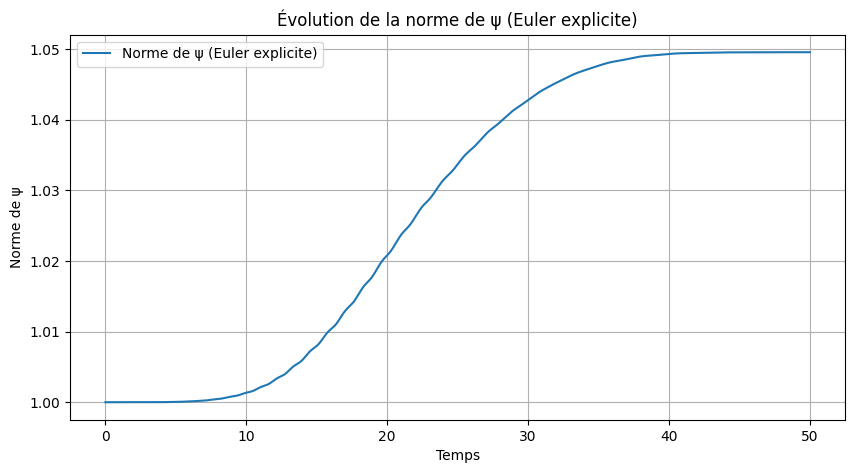

In [8]:
# Données
T = 50
E = 2
delta = 1
dt = 1e-3
t_0 = 0
t_f = T
psi_0 = np.array([0, 0, -1])

Omega_x = np.array([[0, 0, 0], [0, 0, -1], [0, 1, 0]])
Omega_z = np.array([[0, -1, 0], [1, 0, 0], [0, 0, 0]])

# Fonction u(t)
def u(t):
    return (1 - np.cos(2 * np.pi * t / T)) * np.cos(E * t + np.sin(np.pi * t / T) / (np.pi / T))

# Schéma d'Euler explicite
def euler_explicit(psi_0, t_0, t_f, E, delta, dt):
    times = np.arange(t_0, t_f, dt)
    psi = np.zeros((len(times), 3))
    psi[0] = psi_0

    for i in range(1, len(times)):
        t = times[i - 1]
        A_t = E * Omega_z + delta * u(t) * Omega_x
        psi[i] = psi[i - 1] + dt * A_t @ psi[i - 1]
    return times, psi

# Résolution et tracé
times, psi_explicit = euler_explicit(psi_0, t_0, t_f, E, delta, dt)

# Norme de ψ
norms_explicit = np.linalg.norm(psi_explicit, axis=1)

plt.figure(figsize=(10, 5))
plt.plot(times, norms_explicit, label="Norme de ψ (Euler explicite)")
plt.xlabel("Temps")
plt.ylabel("Norme de ψ")
plt.legend()
plt.title("Évolution de la norme de ψ (Euler explicite)")
plt.grid()
plt.show()




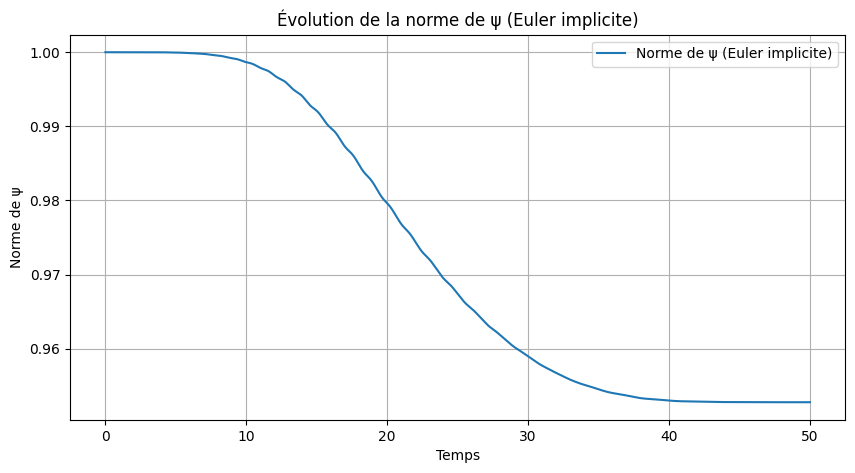

In [9]:
# Shéma d'Euler implicte
def euler_implicit(psi_0, t_0, t_f, E, delta, dt):
    times = np.arange(t_0, t_f, dt)
    psi = np.zeros((len(times), 3))
    psi[0] = psi_0

    I = np.eye(3)

    for i in range(1, len(times)):
        t_next = times[i]
        A_t = E * Omega_z + delta * u(t_next) * Omega_x
        M = I - dt * A_t
        psi[i] = np.linalg.solve(M, psi[i - 1])

    return times, psi

# Résolution et tracé
times, psi_implicit = euler_implicit(psi_0, t_0, t_f, E, delta, dt)

# Norme de ψ
norms_implicit = np.linalg.norm(psi_implicit, axis=1)

plt.figure(figsize=(10, 5))
plt.plot(times, norms_implicit, label="Norme de ψ (Euler implicite)")
plt.xlabel("Temps")
plt.ylabel("Norme de ψ")
plt.legend()
plt.title("Évolution de la norme de ψ (Euler implicite)")
plt.grid()
plt.show()

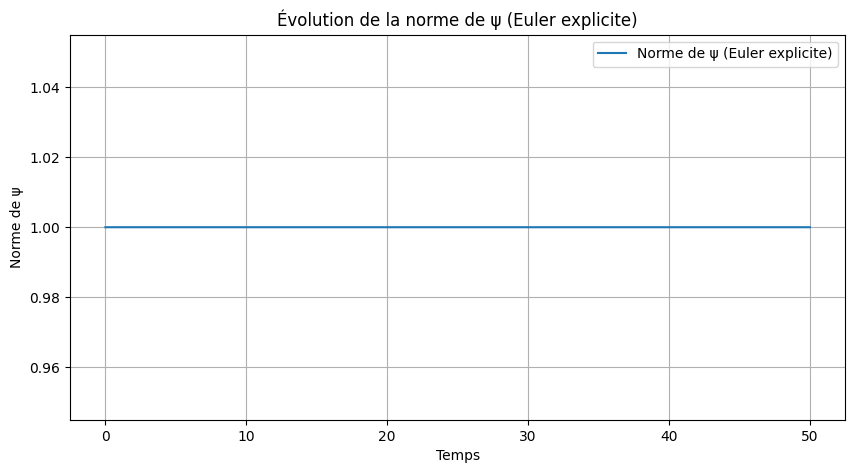

NameError: name 'psi_projete' is not defined

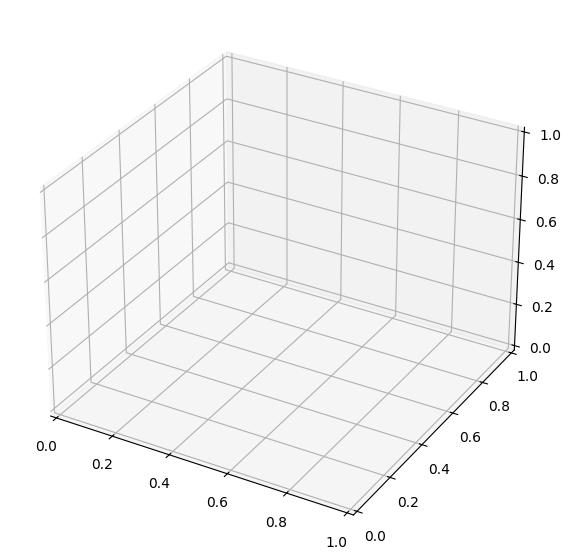

In [10]:
# Schéma d'Euler explicite avec projection 
def euler_explicit(psi_0, t_0, t_f, E, delta, dt):
    times = np.arange(t_0, t_f, dt)
    psi = np.zeros((len(times), 3))
    psi[0] = psi_0

    for i in range(1, len(times)):
        t = times[i - 1]
        A_t = E * Omega_z + delta * u(t) * Omega_x
        psi_next = psi[i - 1] + dt * A_t @ psi[i - 1]
        psi[i] = psi_next / np.linalg.norm(psi_next)
    return times, psi

# Résolution et tracé
times, psi_explicit = euler_explicit(psi_0, t_0, t_f, E, delta, dt)

# Norme de ψ
norms_explicit = np.linalg.norm(psi_explicit, axis=1)

plt.figure(figsize=(10, 5))
plt.plot(times, norms_explicit, label="Norme de ψ (Euler explicite)")
plt.xlabel("Temps")
plt.ylabel("Norme de ψ")
plt.legend()
plt.title("Évolution de la norme de ψ (Euler explicite)")
plt.grid()
plt.show()


# Tracé de la trajectoire en 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot(psi_projete[:, 0], psi_projete[:, 1], psi_projete[:, 2], label="Trajectoire de ψ (Projection)")
ax.set_xlabel("ψ_x")
ax.set_ylabel("ψ_y")
ax.set_zlabel("ψ_z")
ax.legend()
plt.title("Trajectoire en 3D de ψ")
plt.show()


---
**Vocabulaire // ouverture mathématique**

$S^2$ est une surface dans $\mathbb{R}^3$, c'est un cas particulier de **variété différentielle**. L'équation (2) assure que si $\psi$ appartient à la variété, $\dot \psi$ appartient au **plan tangent** en $\psi$ de $S^2$ et donc que $S^2$ est invariant par la dynamique. Pour des simulations en temps long sur des variétés il est souvent important de s'assurer que la dynamique discrete (celle du schéma numérique) reste exactement sur la variété (et non approximativement)

---

## Robustesse et simulation du transfert d'un ensemble de spins

On considère maintenant un ensemble de $p$ spins évoluant chacun selon (2) mais avec différentes valeurs de $E_i \in [E-\alpha,E+\alpha]$ et $\delta_i \in [\delta_{\min}, \delta_{\max}]$. On souhaite vérifier que le même contrôle $u$ fonctionne sur tous simultanément, c'est-à-dire évaluer sa robustesse.

**Question 3**

Simuler $p=10$ spins avec la méthode retenue ci-dessus, en faisant varier $E_i$ puis $\delta_i$. Vérifier que pour $\alpha = 0.5$, $\delta_{\min}= 0.4$ et $\delta_{\max}= 3.5$, la même loi de contrôle $u$ assure tout de même la transition de $-e_z$ à $e_z$ avec une excellente précision à évaluer.

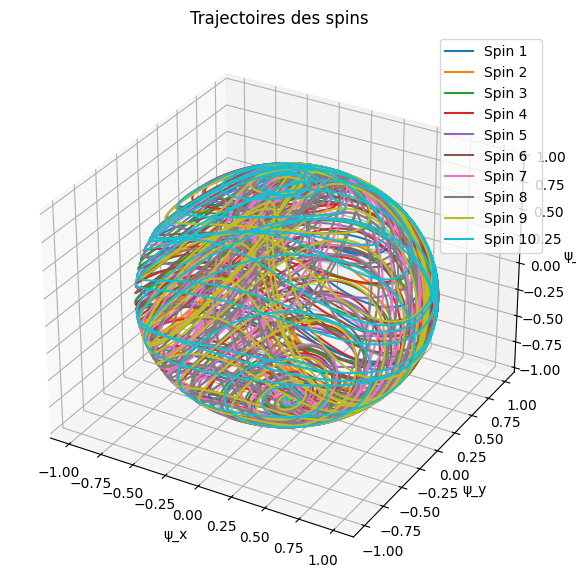

Erreurs finales pour chaque spin : [0.09746866 0.07776196 0.02649493 0.01901019 0.0080754  0.0213798
 0.14425448 0.29472375 0.10005238 0.14558572]
Erreur moyenne : 0.09348072857033389


In [11]:
# Données
alpha = 0.5
delta_min = 0.4
delta_max = 3.5
p = 10
dt = 1e-3

def euler_projete_ensemble(psi_0, t_0, t_f, E_values, delta_values, dt):
    times = np.arange(t_0, t_f, dt)
    psi_all = np.zeros((len(times), p, 3))  # p spins
    psi_all[0, :, :] = np.tile(psi_0, (p, 1))

    for i in range(1, len(times)):
        t = times[i - 1]
        for j in range(p):
            E_i = E_values[j]
            delta_i = delta_values[j]
            A_t = E_i * Omega_z + delta_i * u(t) * Omega_x
            psi_next = psi_all[i - 1, j] + dt * A_t @ psi_all[i -  1, j]
            psi_all[i, j] = psi_next / np.linalg.norm(psi_next)

    return times, psi_all

# Générer les valeurs de E et delta
E_values = np.random.uniform(E - alpha, E + alpha, p)
delta_values = np.random.uniform(delta_min, delta_max, p)

# Résolution
times, psi_ensemble = euler_projete_ensemble(psi_0, 0, T, E_values, delta_values, dt)

# Tracé des trajectoires
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
for j in range(p):
    ax.plot(psi_ensemble[:, j, 0], psi_ensemble[:, j, 1], psi_ensemble[:, j, 2], label=f"Spin {j+1}")
ax.set_xlabel("ψ_x")
ax.set_ylabel("ψ_y")
ax.set_zlabel("ψ_z")
ax.set_title("Trajectoires des spins")
plt.legend()
plt.show()     

# Vérification de la précision
final_states = psi_ensemble[-1, :, :]
errors = np.linalg.norm(final_states - np.array([0, 0, 1]), axis=1)
print(f"Erreurs finales pour chaque spin : {errors}")
print(f"Erreur moyenne : {np.mean(errors)}")


## Simulation de l'opérateur de flot

Pour améliorer l'efficacité de la simulation numérique, on souhaite pouvoir utiliser plusieurs processeurs en parallèle. Pour cela, il est possible d'exploiter le caractère linéaire de l'équation différentielle et de calculer plutôt son opérateur de flot, c'est à dire à l'application $\psi_0 \mapsto \psi(T)$ permettant de passer de la condition initiale à la solution de l'équation (3) au temps $T$. L'équation (3) étant linéaire, le flot de l'équation est une application linéaire, représentée par une matrice $U(T)\in \mathbb{R}^{3\times 3}$ ici en dimension finie, obtenue en résolvant l'équation différentielle suivante :

$$\dot U = (E \Omega_z+\delta u(t) \Omega_x ) U , \qquad U(0)= I_3 \tag{4}$$

où $I_3$ dénote la matrice identité de dimension 3. On notera bien que $U(t)$ est une matrice réelle $3\times 3$.

---
**Vocabulaire // ouverture mathématique**


L'application linéaire $U(t)$ s'appelle **matrice de transition** entre les temps 0 et $t$ en dimension finie, et plus généralement **propagateur** en mécanique quantique, et **semigroupe** dans le cadre des équations aux dérivées partielles.

---

**Question 4** On cherche à résoudre numériquement l'équation (4).

**4a** Vérifier que la connaissance de $U(t)$ permet de résoudre directement l'équation (3) car $\psi(t) = U(t) \psi_0$ pour tout $t\in [0,T]$.

**4b** Prouver que pour tout $t\geq 0$, $U(t)^\top U(t) = I_3$ et justifier que le determinant de $U$ reste égal à 1. 

On en déduit que $U(t)$ reste en tout temps une matrice de rotation. On rappelle que $SO_3$ dénote l'ensemble des matrices de rotation de dimension 3.

**4c** (BONUS) Proposer une méthode de projection sur $SO_3$ et implémenter un schéma Euler avec cette projection. Indication : regarder [ici](https://en.wikipedia.org/wiki/Singular_value_decomposition#Nearest_orthogonal_matrix).

**4d** Vérifier que pour toute matrice $A$ antisymétrique telle que $(I-A)$ est inversible, $(I+A)(I-A)^{-1}\in SO_3$. En déduire que le schéma numérique suivant assure que $U^j$ reste dans $SO_3$ et vérifier qu'il est un schéma consistant d'ordre 1 pour l'équation différentielle (4):
$$U^0= I_3, \qquad U^{j+1}= \left(I_3 + \frac{\Delta t}{2}(E \Omega_z+\delta u(t) \Omega_x )\right) \left(I_3 - \frac{\Delta t}{2}(E \Omega_z+\delta u(t) \Omega_x ) \right)^{-1} U^j \tag{5}$$
On admettra pour cela que le développement limité $\left(I_3 - \Delta t M \right)^{-1} = I_3 + \Delta t M + O(\Delta t^2)$ est valable en matriciel.

**4e** Compléter ci-dessous l'implémentation du schéma de l'equation (5) et vérifier la solution obtenue pour $\psi(T)$ si $\psi(0)=-e_z$.

In [13]:
I=np.eye(3)

def matrice_transition(t_in,t_f,E,dt):
    temps=np.arange(t_in,t_f+dt/2,dt)
    N=len(temps)
    sol=np.empty((N,3,3))
    sol[0]=np.eye(3)
    for j,t in enumerate(temps[:-1]):
        A_t = E*Omega_z + delta*u(t)*Omega_x
        M = np.eye(3) + (dt/2)*A_t
        N = np.eye(3) - (dt/2)*A_t
        sol[j+1]= np.linalg.solve(N,M)@sol[j]
    return temps,sol

# Résolution et tracé
times, U = matrice_transition(0, T, E, dt)
psi_final = U[-1] @ psi_0

print(f"Valeur finale de ψ : {psi_final}")

Valeur finale de ψ : [-0.00346685 -0.00148028  0.99999289]


In [ ]:
I=np.eye(3)

def matrice_transition(t_in,t_f,E,dt):
    temps=np.arange(t_in,t_f+dt/2,dt)
    N=len(temps)
    sol=np.empty((N,3,3))
    sol[0]=np.eye(3)
    for j,t in enumerate(temps[:-1]):
        A_t = E*Omega_z = delta*u(t)*Omega_x
        M = np.eye(3) + (dt/2)*A_t
        N = np.eye(3) - (dt/2)*A_t
        sol[j+1]= np.linalg.solve(N,M)@sol[j]
    return temps,sol

# Résolution et tracé
times, U = matrice_transition(0, T, E, dt)
psi_final = U[-1] @ psi_0

print(f"Valeur finale de ψ : {psi_final}")

temps,sol_mat_trans = matrice_transition(0,T,E,dt)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot((sol_mat_trans@psi_0)[:,0],(sol_mat_trans@psi_0)[:,1],(sol_mat_trans@psi_0)[:,2])
ax.set_title('Solution via (4)')

fig, ax = fig.figure()
ax.plot(temps, np.linalg.norm(np.einsum('nij,nkj-> nik',sol_mat_trans,sol_mat_trans)-I,axis=(1,2)),label='norm of U^T U -I_3 ')
ax.legend()
ax.set_title('Vérification de la préservation du groupe')

print(f"Valeur finale de psi : {sol_mat_trans[-1]@psi_0}")

---
**Vocabulaire // ouverture mathématique**


$SO_3$ est à la fois un groupe et une variété différentielle (avec une structure compatible avec les lois du groupe), c'est ce que l'on appelle un **groupe de Lie**. Les matrices $\Omega_x,\Omega_y,\Omega_z$ jouent un rôle particulier et forment ce que l'on appelle (les générateurs de) l'**Algèbre de Lie** du groupe.

Par ailleurs, le schéma proposé dans l'équation (4) est à la fois relié à la **transformation de Cayley** d'une matrice unitaire, et à une famille de schémas que l'on nomme **approximations de Padé**.


---

## BONUS : Parallélisation de la simulation de systèmes linéaires

**Question 5** On suppose que l'on dispose de $N$ processeurs. Expliquer comment exploiter le calcul de la matrice de transition de la question précédente pour résoudre l'équation (2) de manière parallèle. Commenter le gain (ou non) en terme de temps d'exécution. 

---
**Vocabulaire // ouverture mathématique**

Lorsque l'équation n'est pas linéaire, paralléliser en temps la résolution d'une équation différentielle est un sujet difficile. Il est possible d'utiliser des méthodes  de type **Parareal**.

---